# Anomaly Detection for Unsupervised Learning

1. Core Concepts
   - Identifies data points/events that deviate from the norm
   - Must be minority class in dataset
   - Used to detect: fraud, errors, system failures, unusual patterns

2. Anomaly Detection vs Outlier Treatment
   - Outlier treatment: removes/handles outliers, uses single-feature statistics
   - Anomaly detection: identifies patterns, uses multi-feature analysis

3. Learning Approaches

   A. Supervised
      - Requires labeled data (fraud/no-fraud)
      - Uses: Logistic Regression, SVM, Decision Trees
      - Best when: sufficient labeled examples exist (balanced data)

   B. Unsupervised
      - No labels needed
      - Uses: Isolation Forest, One-Class SVM, LOF, DBSCAN
      - Best when: anomalies are rare, limited examples, lack of ability to identify anomalies (unsupervised)

4. Additional Consideration
   - Need for domain expertise to validate detected anomalies
   - Importance of feature engineering
   - Regular model updating to adapt to new patterns
   - Balance false positives/negatives

## Using Clustering Algorithms (KNN)

- KNN: K-Nearest Neighbor
- It can be used for both Classification and Anomaly detection
- Concept:
    - It measures "nearness" of the data points (e.g. Euclidean distance and Manhattan distance)
    - k value (hyperperameter) is chosen to represent the number of nearest neighbors to be considered
    - It is very crucial to choose the proper k-value for performance  eof the algorithm

![knn](https://dualitytech.com/wp-content/uploads/2022/08/Screen-Shot-2022-08-02-at-10.45.36-AM.png)

Steps for Outlier Detection:
1. Deploy the KNN model (choose the k value)
2. Calculate the distances between data points and indices of the nearest neighbors from the model output
3. Calculate the mean of the k-distances of each observation
4. Plot the data 
5. Determine the cutoff based on the desired outlier value

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotx


from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors

In [327]:
#plt.style.use('ggplot')
plt.style.use(matplotx.styles.dracula)


In [328]:
iris_data = load_iris()

print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [329]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- get the first 2 features for this analysis
- this means the anomaly will be spotted based on the 2 features

In [330]:
df = pd.DataFrame(iris_data.data[:,:2], columns=list(iris_data['feature_names'][:2]))
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

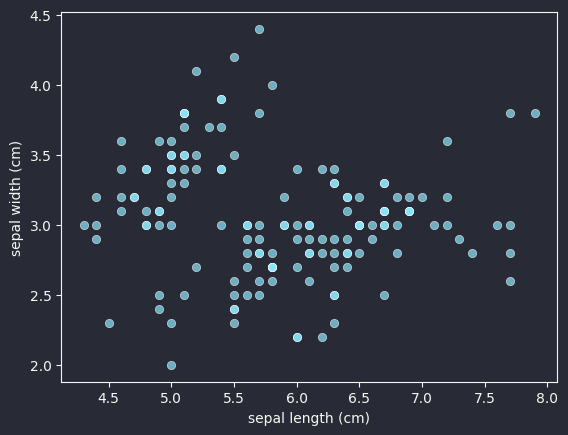

In [331]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', alpha=0.7)

Step 1

In [332]:
#define the model
knn_model = NearestNeighbors(n_neighbors=3)

#fit the model
knn_model.fit(df)

NearestNeighbors(n_neighbors=3)

Step 2

calcualte 2 values using `kneighbors()`
- neigh_dist
    - ndarray of shape (n_queries, n_neighbors)
    - Array representing the lengths to points, only present if return_distance=True.

- neigh_ind
    - ndarray of shape (n_queries, n_neighbors)
    - Indices of the nearest points in the population matrix.

In [333]:
distances, indices = knn_model.kneighbors(df)

Step 3

In [334]:
mean_dist = distances.mean(axis=1)
mean_dist[:10]

array([0.03333333, 0.06666667, 0.03333333, 0.08047379, 0.06666667,
       0.06666667, 0.13333333, 0.03333333, 0.08047379, 0.03333333])

Text(0, 0.5, 'Avg Distances')

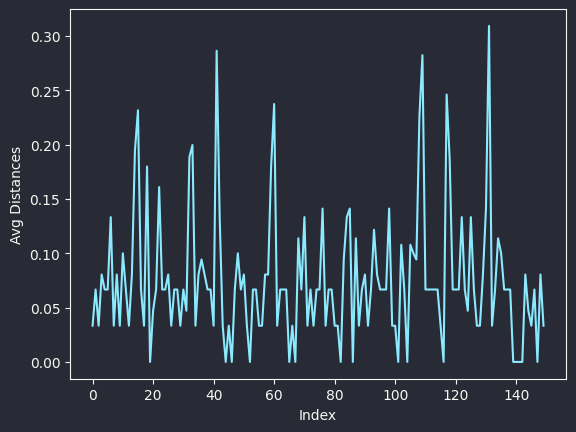

In [335]:
plt.plot(mean_dist)
plt.xlabel('Index')
plt.ylabel('Avg Distances')

- The plot above shows the data points the have the highest average distance from every other data points (neighboring points)
- We can see the peaks that represent the highest distance -> outlier/anomaly
- It seems 0.15 is a good threshold to spot the anomalies
- We can ge the index values of said anomalies using the threshold to spot them in the data

''

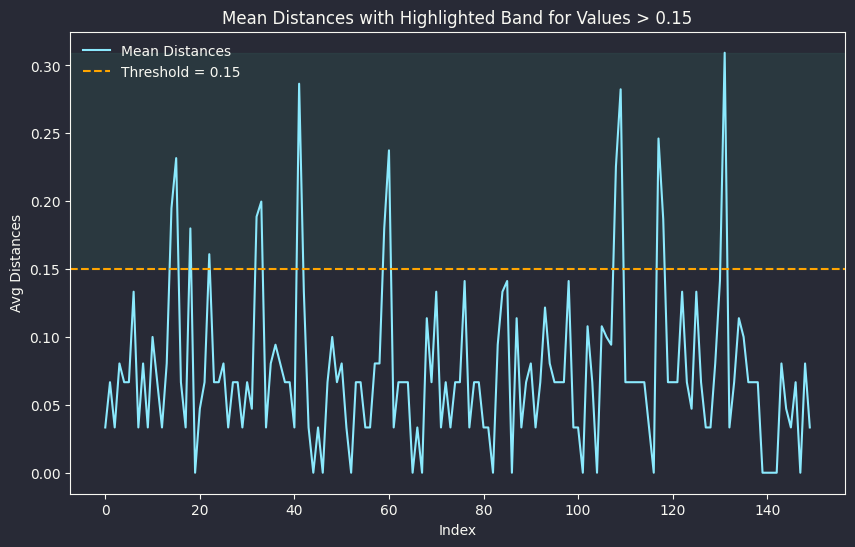

In [361]:
threshold = 0.15
plt.figure(figsize=(10, 6))

plt.plot(mean_dist, label='Mean Distances')
plt.axhline(y=threshold, color='orange', label='Threshold = 0.15', linestyle='--')
plt.axhspan(ymin=threshold, ymax=max(mean_dist),color='darkslategray',alpha=0.4)

plt.legend()
plt.xlabel('Index')
plt.ylabel('Avg Distances')
plt.title(f'Mean Distances with Highlighted Band for Values > {threshold}')
;

In [337]:
anomaly_indices = list(np.where(distances.mean(axis=1) > threshold)[0])
anomaly_indices

[14, 15, 18, 22, 32, 33, 41, 59, 60, 108, 109, 117, 118, 131]

In [338]:
#build an anomaly dataframe
df['kNN Anomaly (Sepal-based)'] = np.where(df.index.isin(anomaly_indices), 1, 0)

df.head()

,sepal length (cm),sepal width (cm),kNN Anomaly (Sepal-based)
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

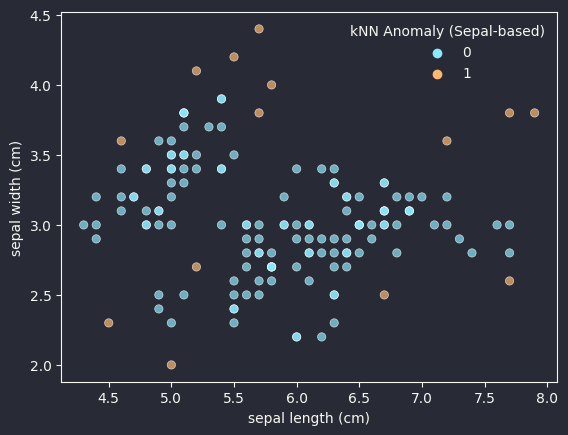

In [339]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', alpha=0.7, hue='kNN Anomaly (Sepal-based)')

> NOTE: some data points may seem a non-outlier because they are not on the extreme values spectrum, but may be an anomaly because they are far from their nearest group (depending on the business application)

## Using PyOD

- `pip install pyod`

- PyOD is an open-source Python library for outlier detection, providing numerous anomaly detection algorithms. Based on popularity and performance, here are four of the most widely used algorithms:
#### Four Popular Anomaly Detection Algorithms from PyOD
1. Isolation Forest (IForest)
    - Description: Isolation Forest identifies anomalies by isolating them rather than profiling normal data.
    - How it works: It creates multiple decision trees, each isolating a random subset of data points. Anomalies require fewer splits to isolate.
    - Pros: Efficient, handles high-dimensional data, robust to noise.
    - Cons: Sensitive to hyperparameters.

2. Angle-Based Outlier Detection (ABOD)
    - Description: ABOD identifies anomalies based on the angles between data points.
    - How it works: It calculates the variance of angles between a point and its neighbors.
    - Pros: Robust to noise, efficient for high-dimensional data.
    - Cons: Sensitive to hyperparameters.

3. One-Class SVM (OCSVM)
    - Description: OCSVM finds the hyperplane that maximally separates data points from the origin.
    - How it works: It uses a kernel function to map data to a higher-dimensional space, then finds the optimal hyperplane.
    - Pros: Effective for high-dimensional data, robust to noise.
    - Cons: Computationally expensive, sensitive to hyperparameters.

#### Data Prep

In [340]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [341]:
# get all columns
X = iris_data.data

#Standardize the data
SS = StandardScaler()
X_scaled = SS.fit_transform(X)

In [342]:
# for visualization purposes
pca_model = PCA(n_components=2)

X_pca = pca_model.fit_transform(X_scaled)

### IForest

In [343]:
from pyod.models.iforest import IForest

#deploy the model
#use contamination hyperparameter to control the intensity of identifying outliers
iforest_model = IForest(contamination=0.15, random_state=10)

In [344]:
#fit the model
iforest_model.fit(X_scaled)

#outlier prediction
iforest_pred = iforest_model.predict(X_scaled)

In [345]:
# do the above in one shot iforest_model.fit_predict()

In [346]:
# Create a DataFrame with PCA data and outlier labels
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],         # First principal component
    'PC2': X_pca[:, 1],         # Second principal component
    'iforest_pred': iforest_pred         # Outlier labels
})

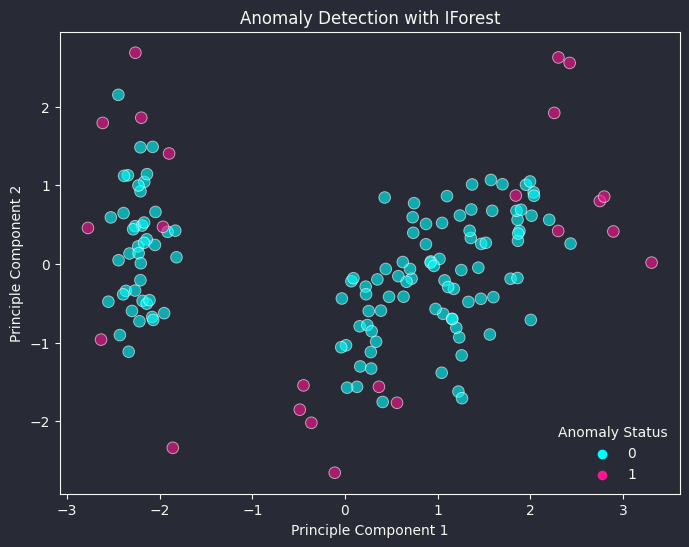

In [347]:
# plotting the outliers

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='iforest_pred',            # Automatically colors based on Outlier labels
    palette={0: 'cyan', 1: 'deeppink'},  # Custom colors
    s=70,                       # Adjust marker size if needed
    alpha=0.6
)

plt.xlabel('Principle Component 1') 
plt.ylabel('Principle Component 2')
plt.title('Anomaly Detection with IForest')

plt.legend(title="Anomaly Status", loc='best')
plt.show()

In [348]:
df = pd.DataFrame(X, columns=iris_data.feature_names)
df['IForest Anomaly'] = iforest_pred
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),IForest Anomaly
136,6.3,3.4,5.6,2.4,0
122,7.7,2.8,6.7,2.0,1
20,5.4,3.4,1.7,0.2,0
128,6.4,2.8,5.6,2.1,0
58,6.6,2.9,4.6,1.3,0
11,4.8,3.4,1.6,0.2,0
89,5.5,2.5,4.0,1.3,0
53,5.5,2.3,4.0,1.3,0
117,7.7,3.8,6.7,2.2,1
131,7.9,3.8,6.4,2.0,1


In [349]:
import plotly.express as px
fig = px.scatter_3d(df, x='sepal width (cm)', y='sepal length (cm)', z='petal width (cm)',
              color='IForest Anomaly')
fig.show()

### ABOD

ABOD is based on the idea that outliers often have different distributions of angles between them and other data points compared to inliers.

In [350]:
from pyod.models.abod import ABOD

abod_model = ABOD(contamination=0.12) #use hyperparameter tuning here

In [351]:
abod_model.fit(X_scaled)

#outlier prediction
abod_pred = abod_model.predict(X_scaled)

In [352]:
# Create a DataFrame with PCA data and outlier labels
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],         # First principal component
    'PC2': X_pca[:, 1],         # Second principal component
    'abod_pred': abod_pred         # Outlier labels
})

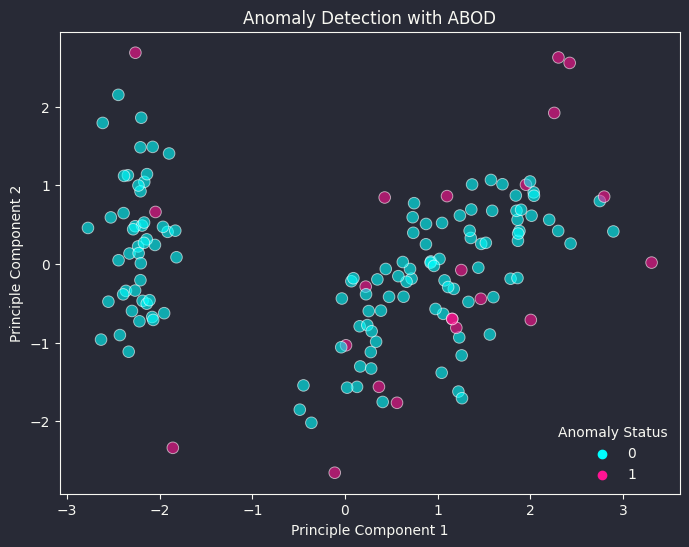

In [353]:
# plotting the outliers

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='abod_pred',            # Automatically colors based on Outlier labels
    palette={0: 'cyan', 1: 'deeppink'},  # Custom colors
    s=70,                       # Adjust marker size if needed
    alpha=0.6
)

plt.xlabel('Principle Component 1') 
plt.ylabel('Principle Component 2')
plt.title('Anomaly Detection with ABOD')
plt.legend(title="Anomaly Status", loc='best')
plt.show()

In [354]:
df['ABOD Anomaly'] = abod_pred
df.sample(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),IForest Anomaly,ABOD Anomaly
11,4.8,3.4,1.6,0.2,0,0
24,4.8,3.4,1.9,0.2,0,0
44,5.1,3.8,1.9,0.4,0,0
72,6.3,2.5,4.9,1.5,0,0
36,5.5,3.5,1.3,0.2,0,1
6,4.6,3.4,1.4,0.3,0,0
78,6.0,2.9,4.5,1.5,0,0
76,6.8,2.8,4.8,1.4,0,1
48,5.3,3.7,1.5,0.2,0,0
0,5.1,3.5,1.4,0.2,0,0


In [355]:
from pyod.models.ocsvm import OCSVM


ocsvm = OCSVM(contamination=0.1)

ocsvm.fit(X_scaled)

# Predict anomalies

ocsvm_pred = ocsvm.predict(X_scaled)

df['OCSVM Anomaly'] = ocsvm_pred

### Plot all 3 for comparison

In [356]:
df.sample(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),IForest Anomaly,ABOD Anomaly,OCSVM Anomaly
62,6.0,2.2,4.0,1.0,1,1,1
112,6.8,3.0,5.5,2.1,0,0,0
52,6.9,3.1,4.9,1.5,0,0,0
127,6.1,3.0,4.9,1.8,0,0,0
100,6.3,3.3,6.0,2.5,1,0,0
81,5.5,2.4,3.7,1.0,0,0,0
35,5.0,3.2,1.2,0.2,0,0,0
87,6.3,2.3,4.4,1.3,0,0,0
115,6.4,3.2,5.3,2.3,0,0,0
36,5.5,3.5,1.3,0.2,0,1,0


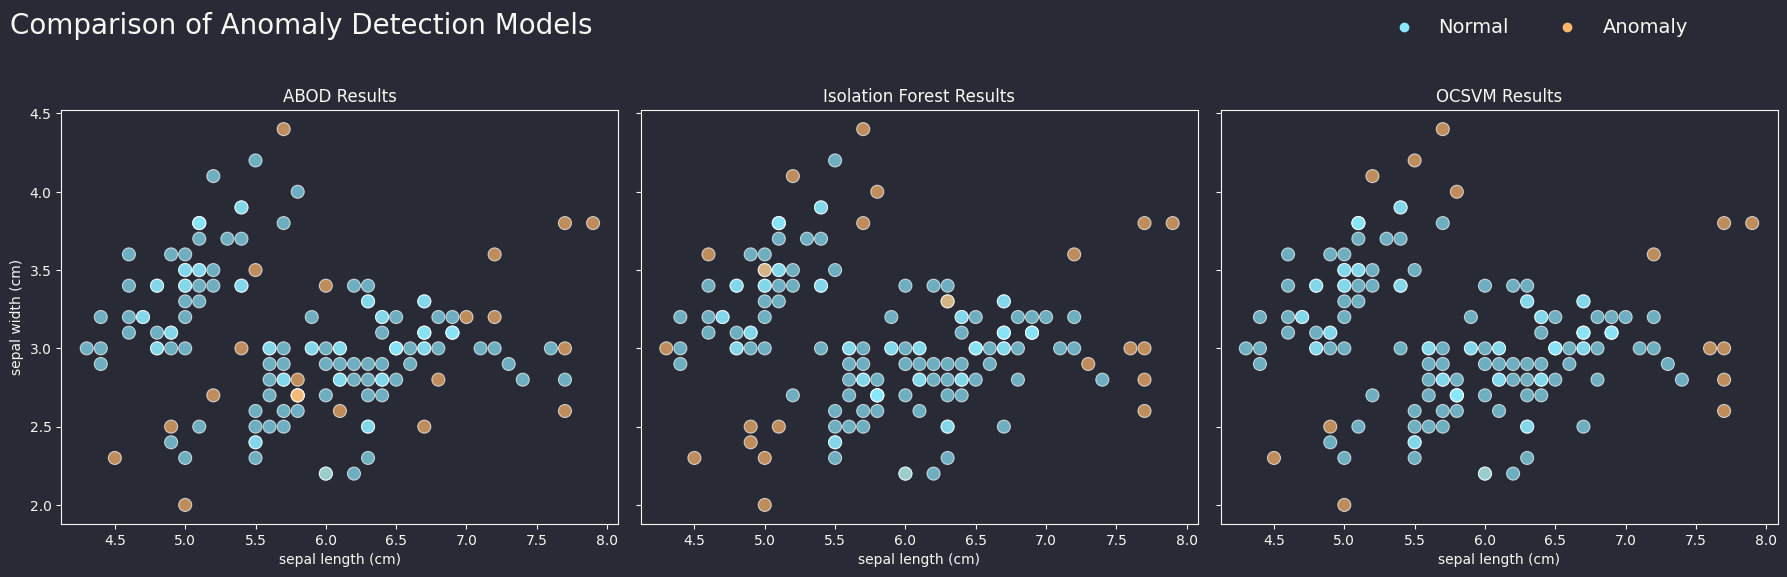

In [357]:

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
fig.suptitle('Comparison of Anomaly Detection Models', fontsize=20, x=0.17)

# Plot the scatter plots for each model's anomaly results
plot0 = sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], s=88, alpha=0.7, hue=df['ABOD Anomaly'], ax=axes[0])
plot1 = sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], s=88, alpha=0.7, hue=df['IForest Anomaly'], ax=axes[1])
plot2 = sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], s=88, alpha=0.7, hue=df['OCSVM Anomaly'], ax=axes[2])


# Remove individual legends
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[2].get_legend().remove()

# Add a single shared legend for all subplots
handles, labels = plot0.get_legend_handles_labels()
custom_labels = ["Normal", "Anomaly"]  # Rename labels
fig.legend(handles, custom_labels, loc='upper right', ncol=2,  bbox_to_anchor=(0.95, 1), fontsize=14)

# Set titles and labels
axes[0].set_title('ABOD Results')
axes[1].set_title('Isolation Forest Results')
axes[2].set_title('OCSVM Results')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Some outliers may seem normal and close to their neighboring cluster. However, that's only for the 2-d perspective. It may be far from it's cluster in the 3rd (or 4th) dimension as seen in the 3D plot above. 

### Plot All 4

In [358]:
# add kNN using previous code
df['kNN Anomaly'] = np.where(df.index.isin(anomaly_indices), 1, 0)
df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),IForest Anomaly,ABOD Anomaly,OCSVM Anomaly,kNN Anomaly
54,6.5,2.8,4.6,1.5,0,0,0,0
49,5.0,3.3,1.4,0.2,0,0,0,0
94,5.6,2.7,4.2,1.3,0,0,0,0


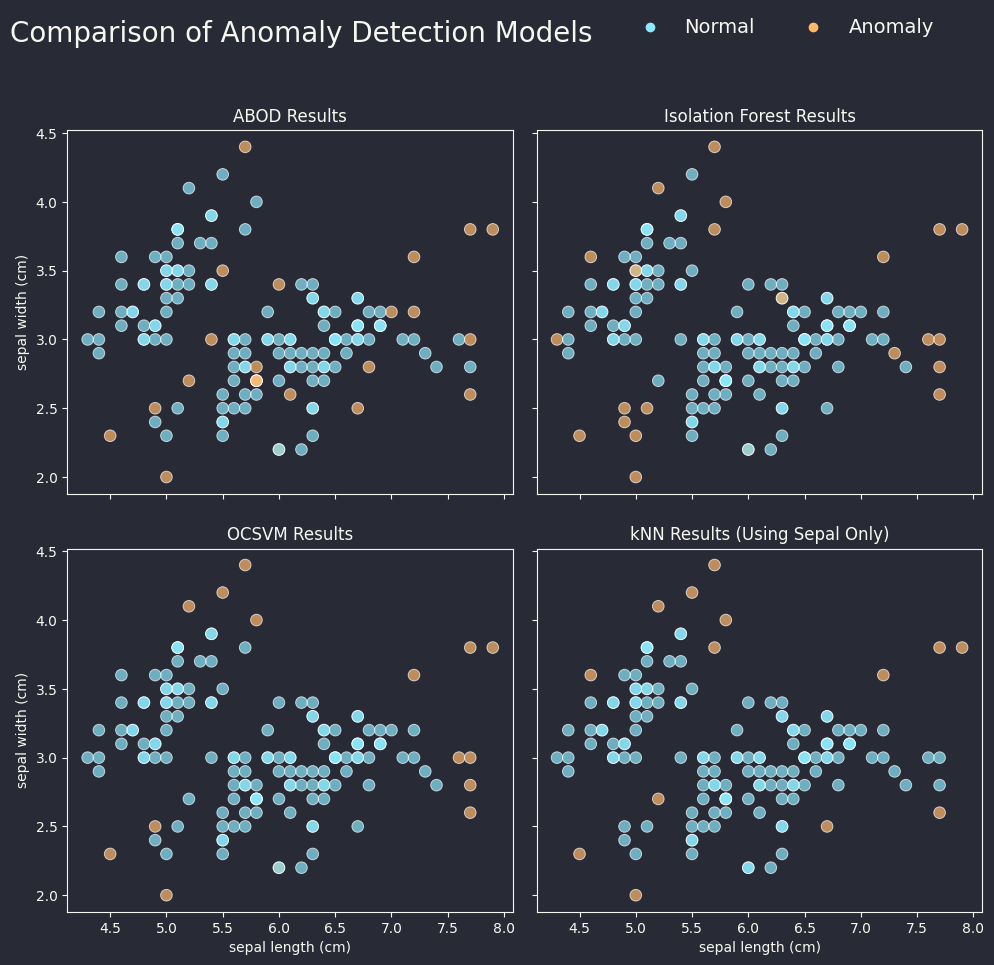

In [359]:

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(10 , 10), sharex=True, sharey=True)
fig.suptitle('Comparison of Anomaly Detection Models', fontsize=20, x=.3)
axes = axes.flatten()
# Plot the scatter plots for each model's anomaly results
plot0 = sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], s=70, alpha=0.7, hue=df['ABOD Anomaly'], ax=axes[0])
plot1 = sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], s=70, alpha=0.7, hue=df['IForest Anomaly'], ax=axes[1])
plot2 = sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], s=70, alpha=0.7, hue=df['OCSVM Anomaly'], ax=axes[2])
plot3 = sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], s=70, alpha=0.7, hue=df['kNN Anomaly'], ax=axes[3])

# Remove individual legends
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[2].get_legend().remove()
axes[3].get_legend().remove()

# Add a single shared legend for all subplots
handles, labels = plot0.get_legend_handles_labels()
custom_labels = ["Normal", "Anomaly"]  # Rename labels
fig.legend(handles, custom_labels, loc='upper right', ncol=2,  bbox_to_anchor=(0.95, 1), fontsize=14)

# Set titles and labels
axes[0].set_title('ABOD Results')
axes[1].set_title('Isolation Forest Results')
axes[2].set_title('OCSVM Results')
axes[3].set_title('kNN Results (Using Sepal Only)')

plt.tight_layout(h_pad=2,rect=[0, 0.03, 1, 0.95])
plt.show()
